In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
top_level = pd.read_pickle("WSBSubmissonsdata.pkl")
comm = pd.read_pickle("Commentsdata.pkl")

In [4]:
parents = top_level["id"]
parents_list = list(parents)

In [5]:
for i in range(len(parents_list)):
    parents_list[i] = "t3_" + parents_list[i]

In [6]:
children = {}
for parent in parents_list:
    child = comm[comm.parent_id == parent]
    children[parent] = child

In [7]:
comms_in_first = []
for i in range(0,300):
    comms_in_first.append({})
    for parent in parents_list:
        times = list(children[parent]["time_created"])
        times.sort()
        start = int(top_level[top_level.id == parent[3:]]["time_created"])
        count = 0
        for t in times:
            if t - start <= 180 * (i+1):
                count += 1
        comms_in_first[i][parent[3:]] = count

In [8]:
for i in range(0,300):
    name = 'comms_in_first' + str(i+1)
    top_level[name] = pd.Series(comms_in_first[i])

In [9]:
correlations = []
for i in range(0,300):
    name = 'comms_in_first' + str(i+1)
    correlations.append(top_level[[name, 'num_comments']].astype(float).corr()[name]['num_comments'])

In [10]:
corr_series = pd.Series(correlations)

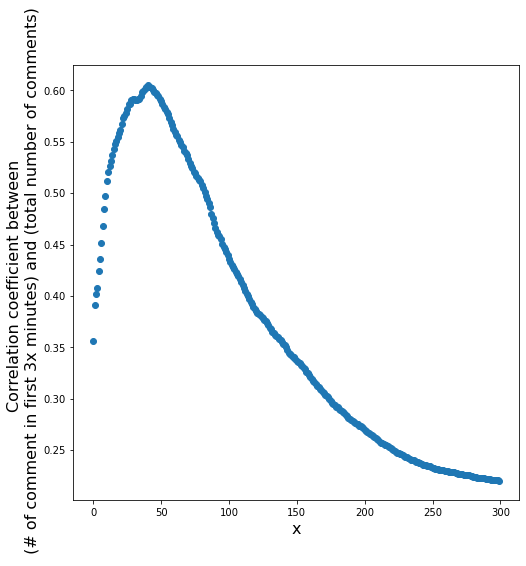

In [11]:
plt.figure(figsize = (8,8))

plt.scatter(pd.Series(range(0,300)), corr_series)
plt.xlabel("x", fontsize = 16)
plt.ylabel("Correlation coefficient between \n (# of comment in first 3x minutes) and (total number of comments)", fontsize = 16)

plt.show()